## Simple Audio
We load an audio sample in WAV format form an internet url, convert it to a numpy array. 

The array shape is now 1-dimensional, time (or sample number) and volume.

To simplfy things, we remove one channel on stereo samples.

We display the audio data as a line plot and we play the sample. 


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave

import os

import requests
import io
import IPython.display as ipd

In [23]:
# this time we load a file from the internet directly
url = "http://soundbible.com/grab.php?id=2190&type=wav"

soundData = requests.get(url).content

# to handle the data directly with the *wave* library we need to convert it
sound = io.BytesIO(soundData)
sound.seek(0)

# sound is now a file like data structure which *wave* can handle
# alternatively, you could use a local file in place of sound
soundFile = wave.open(sound)

soundParms = soundFile.getparams()
print("File parameters:",soundParms)

# Each channel is 2 bytes long because the audio is 16 bit. 
# If is 8 bit, each channel will only be one byte. 
# You can use the getsampwidth() method to determine this. 
# Also, getchannels() will determine if its mono or stereo.

File parameters: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=190522, comptype='NONE', compname='not compressed')


In [21]:
#Extract a portion (e.g. 10000 frames) of rawaudio
# we can rewind first, otherwise we get different data
soundFile.rewind()
signal = soundFile.readframes(min(20000,soundParms.nframes))
# determine the type, 8 bit or 16 bit
sigType = np.int16 if soundParms.sampwidth == 2 else np.int8
signal = np.frombuffer(signal, sigType)
# if stereo, drop second channel
if soundParms.nchannels == 2:
    # create a mask with odd indices
    mask = [i for i in range(signal.shape[0]) if i%2]
    signal = np.delete(signal,mask)

print(type(signal),signal.shape)

<class 'numpy.ndarray'> (20000,)


## Plotting audio data
We can display the audio data as a line plot. X-Axis is sample number (relates to time), Y-axis is volume.

<class 'numpy.ndarray'> (2000,)


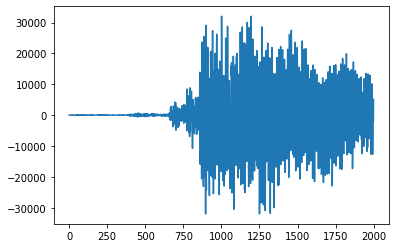

In [16]:
plt.plot(signal)
#plt.show()

## Playing the sound
There are various libraries to play sounds, this one is the simplest for remote Jupyter


In [22]:
ipd.Audio(signal, rate=soundParms.framerate) 
# you could also load a local WAV file



## Generating and writing audio
Audio data can be created with mathematical methods, just like image data.

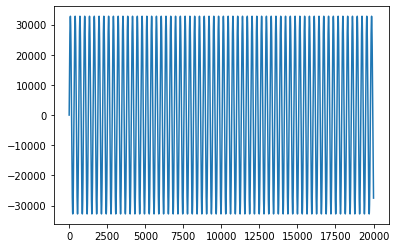

In [49]:
# create sample index
sine_x = np.arange(0,20000,1)
# create sin value, scale it to int16 range
sine_y = (np.sin(sine_x/50)*np.iinfo(np.int16).max).astype(np.int16)
plt.plot(sine_x,sine_y)

In [50]:
# play the sound
ipd.Audio(sine_y, rate=20000) 

In [53]:
# write the sound file
# we save and load the image in the same fashion as before
# but we use "png" format which gives a better quality for the
# next chapter
TARGET_DIR = "data"
# if the directory doesn't exist, we create it
if not TARGET_DIR in os.listdir():
    os.mkdir(TARGET_DIR)
    
file = "audio1.wav"
audioFile = os.path.sep.join([TARGET_DIR,file])

# calling this cell repeatedly throws an error
# if the audio file is still open
if audio != None:
    audio.close()

    # open the file
audio = wave.open(audioFile,"wb")

# set the paramters
audio.setnchannels(1)
audio.setsampwidth(2)
audio.setframerate(20000)

# write data
for i in sine_y:
    audio.writeframes(i)

# close file
audio.close()



## Summary
Audio data can be handled in a way similar to images. We can convert to and from numpy data structures.

More information for example at the *wave* library documentation [https://docs.python.org/3.7/library/wave.html](https://docs.python.org/3.7/library/wave.html)